In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import os
import theano
from PIL import Image
from numpy import *
import cv2 as cv

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [6]:
# Read image here in an list
path = "input_path"
listing = os.listdir(path)
count=size(listing)

# Validate size of an random image is 128*128
im_random=cv.imread("input_path//{0}".format(listing[23]))
im_random.shape

(128, 128, 3)

In [7]:
# Convert the image data into an imatrix. imatrix would just be a flat represetation of each image's pixel data in each row.
# This imatrix is whats gonna be used to create X_train, X_validation and X_test data.
imatrix = np.array([cv.imread("input_path//{0}".format(img)).flatten() for img in listing])
# imatrix = []
# for img in listing:
#     im_reading_now=cv.imread("input_path//{0}".format(img))
#     imatrix = np.vstack((imatrix,im_reading_now.flatten()))
print (imatrix.shape)
print (type(imatrix))
print (imatrix.ndim)

(1000, 49152)
<class 'numpy.ndarray'>
2


In [8]:
# Lets create y, i.e labels. This is whats gonna be used to create Y_train, Y_validation and Y_test data.
label=np.ones((count,), dtype=int)
label[0:501]=0
label[501:1001]=1
size(label)

1000

In [9]:
# Lets randomnly suffle the data to avoid overfitting
data,label=shuffle(imatrix,label,random_state=2)
train_data=[data,label]

In [22]:
# Keras Parameters
batch_size = 32
nb_classes = 2
nb_epoch = 15
img_rows, img_col = 128, 128
img_channels = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [23]:
(X,y) = (train_data[0],train_data[1])
X.shape

(1000, 49152)

In [24]:
# Splitting X and y in training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [25]:
# Splitting X_train and y_train in training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=4)

In [26]:
# Validating the individual sizes
print ("X_train : {0}".format(X_train.shape))
print ("y_train :{0}".format(y_train.shape))

print ("X_val : {0}".format(X_val.shape))
print ("y_val : {0}".format(y_val.shape))

print ("X_test : {0}".format(X_test.shape))
print ("y_test : {0}".format(y_test.shape))

X_train : (640, 49152)
y_train :(640,)
X_val : (160, 49152)
y_val : (160,)
X_test : (200, 49152)
y_test : (200,)


In [27]:
# Reshaping the data to pass to CNN
X_train = X_train.reshape(X_train.shape[0], 3, 128, 128)
X_val = X_val.reshape(X_val.shape[0], 3, 128, 128)
X_test = X_test.reshape(X_test.shape[0], 3, 128, 128)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_val = np_utils.to_categorical(y_val, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [28]:
# Validating the individual sizes
print ("X_train : {0}".format(X_train.shape))
print ("y_train :{0}".format(y_train.shape))

print ("X_val : {0}".format(X_val.shape))
print ("y_val : {0}".format(y_val.shape))

print ("X_test : {0}".format(X_test.shape))
print ("y_test : {0}".format(y_test.shape))

X_train : (640, 3, 128, 128)
y_train :(640, 2)
X_val : (160, 3, 128, 128)
y_val : (160, 2)
X_test : (200, 3, 128, 128)
y_test : (200, 2)


In [29]:
# Regularize the data
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

In [30]:
# Define model now
model = Sequential()

model.add(Convolution2D(nb_filters,
                        (nb_conv,nb_conv),
                        border_mode='valid',
                        activation='relu', 
                        input_shape=(img_channels,img_rows,img_col), 
                        data_format = 'channels_first'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c:\users\aksha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(3, 128, 1..., data_format="channels_first", padding="valid")`
  if __name__ == '__main__':
c:\users\aksha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [31]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch,
         verbose=1, validation_data=(X_val,y_val))

Train on 640 samples, validate on 160 samples
Epoch 1/15
640/640 [==============================] - 23s 35ms/step - loss: 1.1582 - acc: 0.5828 - val_loss: 0.5737 - val_acc: 0.7562
Epoch 2/15
640/640 [==============================] - 22s 34ms/step - loss: 0.3995 - acc: 0.8562 - val_loss: 0.3346 - val_acc: 0.8938
Epoch 3/15
640/640 [==============================] - 22s 34ms/step - loss: 0.3030 - acc: 0.9172 - val_loss: 0.2926 - val_acc: 0.9062
Epoch 4/15
640/640 [==============================] - 22s 35ms/step - loss: 0.2296 - acc: 0.9250 - val_loss: 0.2483 - val_acc: 0.8938
Epoch 5/15
640/640 [==============================] - 22s 35ms/step - loss: 0.2065 - acc: 0.9312 - val_loss: 0.2001 - val_acc: 0.9187
Epoch 6/15
640/640 [==============================] - 22s 35ms/step - loss: 0.1577 - acc: 0.9328 - val_loss: 0.1831 - val_acc: 0.9187
Epoch 7/15
640/640 [==============================] - 22s 35ms/step - loss: 0.1436 - acc: 0.9469 - val_loss: 0.1579 - val_acc: 0.9313
Epoch 8/15
640/6

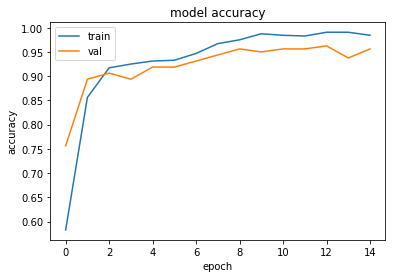

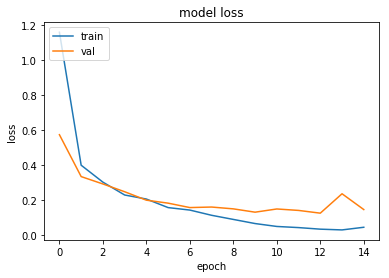

In [32]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
# Test this trained model on our test data
score = model.evaluate(X_test, y_test, verbose=1)
print ("Test Score :", score[0])
print ("Test accuracy: ", score[1])
print (model.predict_classes(X_test[1:5]))
print (y_test[1:5])

200/200 [==============================] - 5s 24ms/step
Test Score : 0.09597467705607414
Test accuracy:  0.975
[0 0 1 0]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [34]:
# Now lets save the model to disk
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
model.save("whole_model.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk
